# ExMAS with NYC data

> process input data to generate ExMAS input


We use NYC requests data stored at [kaggle](https://www.kaggle.com/yasserh/nyc-taxi-trip-duration/) 

* please donwload the 'NYC.csv' to run the experiments from [here](https://www.kaggle.com/yasserh/nyc-taxi-trip-duration/?select=NYC.csv)



In [1]:
import pandas as pd
import os
import geopandas as gpd
import osmnx as ox
import os
cwd = os.getcwd()


In [2]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData

In [3]:
params = ExMAS.utils.get_config('ExMAS/data/configs/nyc.json') # load the default 

In [4]:
inData = ExMAS.utils.load_G(inData, params, stats = True) # use this if you already have a graph and 

In [5]:
COLS = ['pickup_datetime', 'dropoff_datetime','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','trip_duration']
PATH  = os.path.join(params.paths.nyc_trips)
df = pd.read_csv(PATH, index_col = 0).sort_values('pickup_datetime')[COLS]
df

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
id,,,,,,,
id0190469,2016-01-01 00:00:17,2016-01-01 00:14:26,-73.981743,40.719158,-73.938828,40.829182,849
id1665586,2016-01-01 00:00:53,2016-01-01 00:22:27,-73.985085,40.747166,-73.958038,40.717491,1294
id1210365,2016-01-01 00:01:01,2016-01-01 00:07:49,-73.965279,40.801041,-73.947479,40.815170,408
id3888279,2016-01-01 00:01:14,2016-01-01 00:05:54,-73.982292,40.751331,-73.991341,40.750340,280
id0924227,2016-01-01 00:01:20,2016-01-01 00:13:36,-73.970108,40.759800,-73.989357,40.742989,736
...,...,...,...,...,...,...,...
id1255468,2016-06-30 23:58:52,2016-07-01 00:06:44,-73.982750,40.745289,-73.969002,40.757950,472
id2013516,2016-06-30 23:59:09,2016-07-01 00:11:43,-73.955109,40.689564,-73.978203,40.685802,754
id0376262,2016-06-30 23:59:10,2016-07-01 00:41:36,-73.873093,40.774097,-73.926704,40.856739,2546


In [6]:
[nodes, distances] = ox.distance.nearest_nodes(inData.G,df.pickup_longitude,df.pickup_latitude, return_dist = True)
df['origin'] = nodes
df['origin_distance'] = distances

In [7]:
[nodes, distances] = ox.distance.nearest_nodes(inData.G,df.dropoff_longitude,df.dropoff_latitude, return_dist = True)
df['destination'] = nodes
df['destination_distance'] = distances

In [8]:
df['max_distance'] = df[["origin_distance", "destination_distance"]].max(axis=1)
df['2000'] = 2000
df['max_distance'] = df[["max_distance", '2000']].min(axis=1)

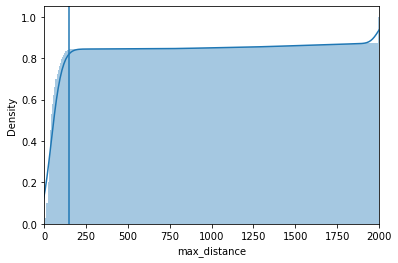

In [9]:
kwargs = {'cumulative': True}
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(df.max_distance, hist_kws=kwargs, kde_kws=kwargs, ax = ax,bins = 300)
ax.set_xlim(0,2000)
ax.axvline(150,0,1)

In [10]:
dist_threshold = 150 # filter for the manhattan trips only
df = df[(df.max_distance<dist_threshold)]

In [13]:
COLS = ['pickup_datetime', 'dropoff_datetime','trip_duration', 'origin','destination']
df[COLS].to_csv('ExMAS/data/nyc/nyc_requests.csv')